# Creating the datasets

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
import statistics
import math

In [63]:
#Positions In array
samples = 100
positions = np.arange(0,samples)

#Sorted set Construction
noise_line = np.random.randint(-samples,samples*2,samples).reshape((-1,1))
sorted_numbers = sorted(noise_line)

#Exponential construction
exp_array = []
for i in positions:
    exp_array.append(math.exp(i*math.log(2*samples)/samples))
exp_array = np.array(exp_array)

#Storing in dictionary
data_sets = {
    'Linear': (2*positions).reshape((-1,1)),
    'Sorted': sorted_numbers,
    'Exponential': exp_array.reshape((-1,1))
}

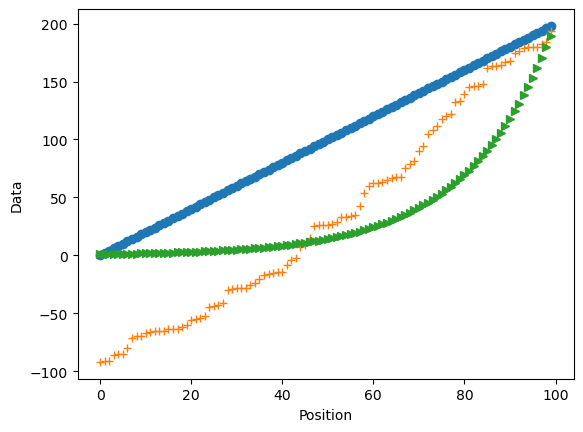

In [64]:
plt.plot(positions, data_sets['Linear'],'o')
plt.plot(positions, data_sets['Sorted'],'+')
plt.plot(positions, data_sets['Exponential'], '>')
plt.xlabel('Position')
plt.ylabel('Data')
plt.show()

# Functions For displayng results  

In [65]:
def histogram (test, predictions, data_set):
    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(5)
    titles = ('0', '1', '2', '3', '4', '5-15', '15-50', '>=50')
    y_positions = np.arange(len(titles))
    performance = [0] * 8

    for i in range(len(test)):
        predictions[i] = round(predictions[i])
        dist = abs(predictions[i] - test[i]).astype(int)
        if dist < 5:
            performance[dist] += 1
        elif dist < 15:
            performance[5] += 1
        elif dist < 50:
            performance[6] += 1
        else:
            performance[7] +=1 

    ax.barh(y_positions, performance, color='green')
    ax.set_yticks(y_positions, labels=titles)
    ax.invert_yaxis()
    ax.set_xlabel('Sums')
    ax.set_ylabel('Distanse of prediction')
    ax.set_title('Output accuracy '+ data_set + ' data set' )


In [66]:
def plt_data(x_test, y_test, predictions, dataset_name):
    plt.figure(figsize=(4, 4))
    plt.title("Prediction Visualization")
    plt.xlabel("Array positions")
    plt.ylabel("Keys")
    plt.plot(y_test, x_test, '>', label='Rreal positions')
    plt.plot(predictions, x_test, '*', label='Predictions')
    plt.legend()
    plt.show()
    histogram(y_test,  predictions, dataset_name)
    plt.show()

# Regression Models

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [68]:
data_store = {"Linear":{}, "Sorted":{}, "Exponential":{}}

In [69]:
def mean_stdev(test, predictions):
    n = len(predictions)
    data = []
    for i in range(n-1):
        predictions[i] = predictions[i]
        data.append(abs(predictions[i]-test[i]))

    mae = round(statistics.mean(data),3)
    stdev = round(statistics.stdev(data,mae),3)

    return mae, stdev


def max_min_error(test, predictions):
    maximum = abs(predictions[0]-test[0])
    minimum = abs(predictions[0]-test[0])
    error = 0
    for i in range(1,len(predictions)):
        error = abs(predictions[i]-test[i])
        if error > maximum: maximum = error 
        elif error < minimum: minimum= error
    return minimum,maximum 

## Linear Regression

In [70]:
def linear_reg(x_train, x_test, y_train):
    linear_reg_model = LinearRegression().fit(x_train, y_train)
    predictions = linear_reg_model.predict(x_test)
    return predictions

def linear_plot(dataset_name):
    x_train, x_test, y_train, y_test = train_test_split(data_sets[dataset_name], positions, test_size=0.2, random_state=0)
    #Linear reg
    predictions = linear_reg(x_train, x_test, y_train)
    predictions = (np.round(predictions)).astype(int)
    plt_data(x_test, y_test, predictions, dataset_name)

    errors_store =[]
    for i in range(1,len(predictions)):
        errors_store.append(abs(predictions[i]-y_test[i]))

    #mae, stdev=mean_stdev(y_test,predictions)
    #minimum,maximum = max_min_error(y_test,predictions)
    #returning dictionary for further model evaluation
    return {"Linear_reg":errors_store}
    
    

### Linear data set 

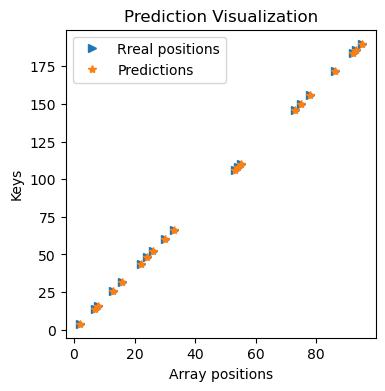

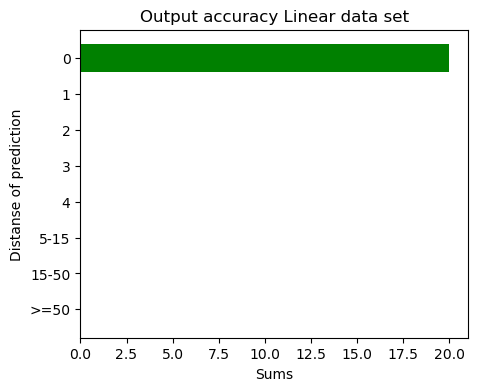

In [71]:
data_store["Linear"].update(linear_plot("Linear"))

### Sorted data set

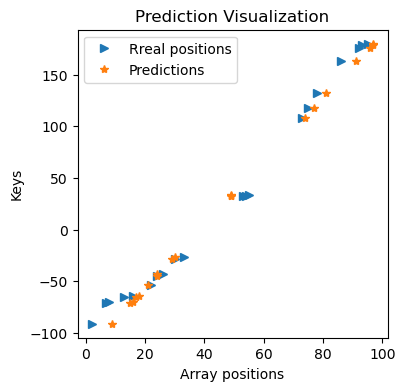

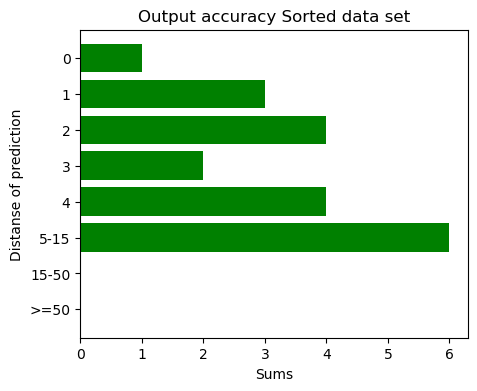

In [72]:
data_store["Sorted"].update(linear_plot("Sorted"))

### Exponential data set 

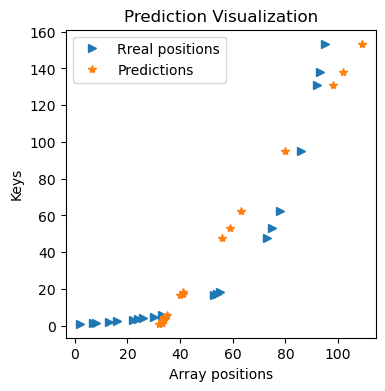

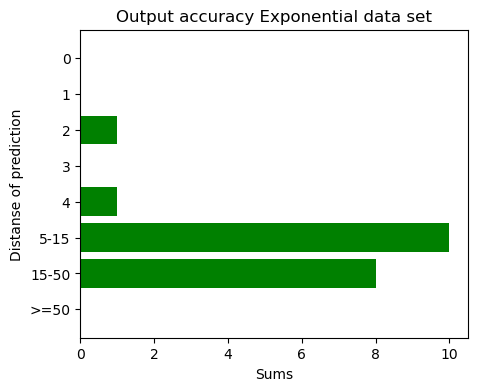

{'Linear': {'Linear_reg': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, 'Sorted': {'Linear_reg': [5, 7, 6, 2, 4, 2, 1, 5, 2, 4, 4, 3, 4, 8, 1, 1, 0, 3, 8]}, 'Exponential': {'Linear_reg': [6, 30, 14, 16, 9, 17, 17, 13, 14, 13, 6, 15, 20, 26, 4, 12, 10, 2, 25]}}


In [73]:
data_store["Exponential"].update(linear_plot("Exponential"))
print(data_store)

## Polynomial Regression

In [74]:
def plynomial_reg(x_train, x_test, y_train, num, intercept ):
    #Creating and training the model 
    polynomial = PolynomialFeatures(degree=(1,num), include_bias=False, interaction_only=False, order='C' )
    poly_features = polynomial.fit_transform(x_train)
    poly_reg_model = LinearRegression(
        fit_intercept=intercept, copy_X=False, positive=False)
    poly_reg_model.fit(poly_features, y_train)
    # Making the prediction
    predictions = poly_reg_model.predict(polynomial.fit_transform(x_test))
    return predictions


def poly_plot(dataset_name, train_size, max_polynomial_degree, intercept=False):
    
    # Splinting the dataset
    x_train, x_test, y_train, y_test = train_test_split(
        data_sets[dataset_name], positions, train_size=train_size, random_state=42, shuffle=True)
    
    predictions = plynomial_reg(
        x_train, x_test, y_train, max_polynomial_degree, intercept)
    predictions = (np.round(predictions)).astype(int)
    plt_data(x_test, y_test, predictions, dataset_name)
    

    errors_store =[]
    for i in range(1,len(predictions)):
        errors_store.append(abs(predictions[i]-y_test[i]))

    #mae, stdev=mean_stdev(y_test,predictions)
    #minimum,maximum = max_min_error(y_test,predictions)
    #returning dictionary for further model evaluation
    return {"Polynomial_reg":errors_store}


### Linear dataset test 

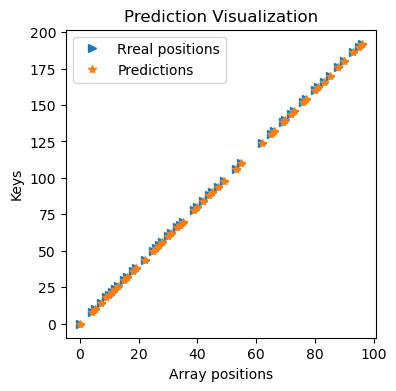

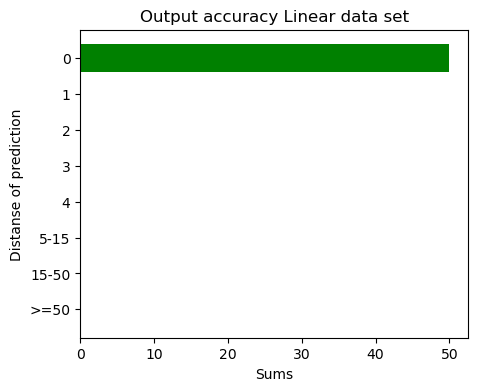

In [75]:
data_store["Linear"].update(poly_plot('Linear',0.5,3))

### Sorted dataset test 

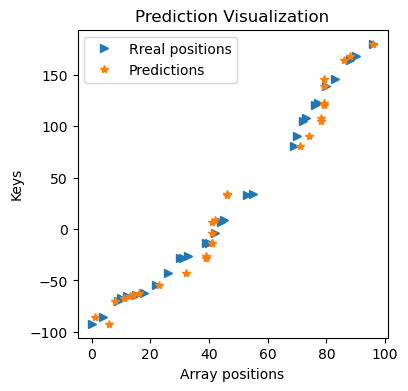

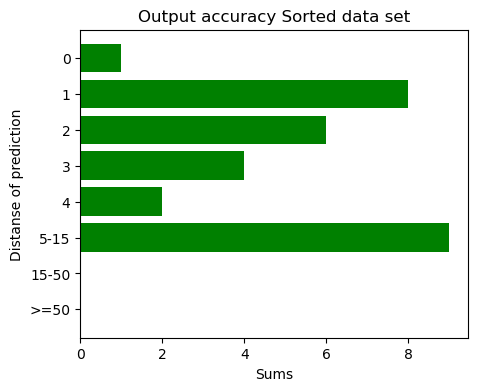

In [76]:
data_store["Sorted"].update(poly_plot('Sorted', 0.7, 8, True))


### Exponential dataset test 

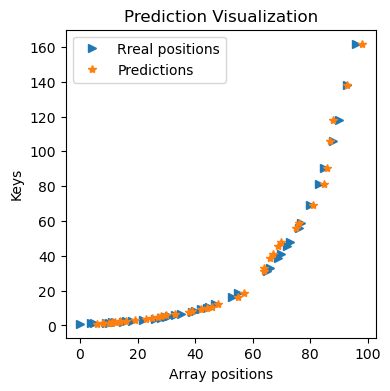

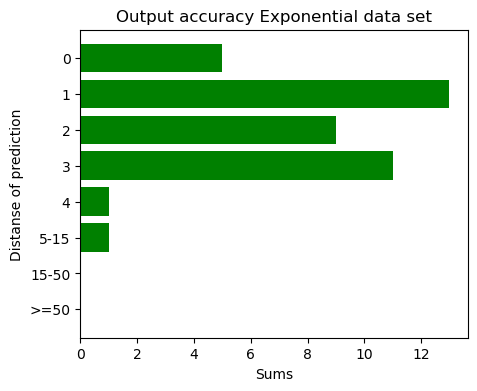

In [77]:
data_store["Exponential"].update(poly_plot('Exponential', 0.6, 7))

## Nearest Neighbors Regression

In [78]:
def nearest_neighbors_reg(x_train, x_test, y_train, neighbor_chech, leaf_size, weights):
    knn = neighbors.KNeighborsRegressor(
        n_neighbors=neighbor_chech, weights=weights, algorithm='auto', leaf_size=leaf_size)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    return predictions


def knn_plot(dataset_name, train_size, neighbors, leaf_size, weights="uniform"):
    # Splinting the dataset
    x_train, x_test, y_train, y_test = train_test_split(
        data_sets[dataset_name], positions, train_size=train_size, random_state=42, shuffle=True)
    #Making predictions 
    predictions = nearest_neighbors_reg(
        x_train, x_test, y_train, neighbors, leaf_size, weights)
    predictions = (np.round(predictions)).astype(int)
    #Ploting answers 
    plt_data(x_test, y_test, predictions, dataset_name)
    
    errors_store =[]
    for i in range(1,len(predictions)):
        errors_store.append(abs(predictions[i]-y_test[i]))

    #mae, stdev=mean_stdev(y_test,predictions)
    #minimum,maximum = max_min_error(y_test,predictions)
    #returning dictionary for further model evaluation
    return {"Knn_reg":errors_store}

    


### Linear dataset test 

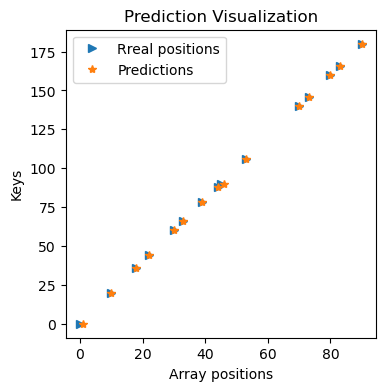

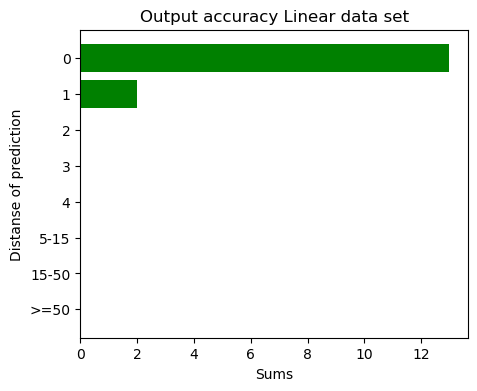

In [79]:
data_store["Linear"].update(knn_plot('Linear',0.85, 2, 1, "distance"))

### Sorted dataset test 

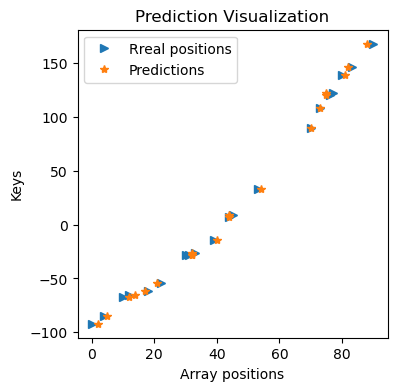

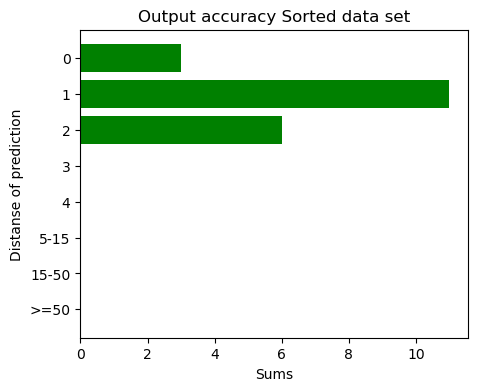

In [80]:
data_store["Sorted"].update(knn_plot('Sorted',0.8, 3, 1, "distance"))

### Exponential dataset test 

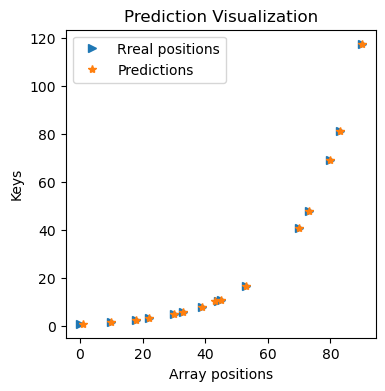

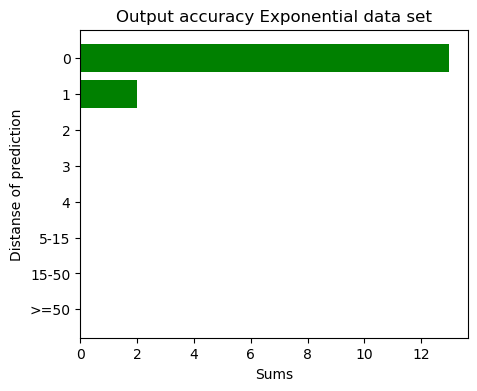

In [81]:
data_store["Exponential"].update(knn_plot('Exponential',0.85, 2, 1, "distance"))

## Gaussian Regression

In [82]:
def gaussian_reg(x_train, x_test, y_train):
    krnl = RBF(length_scale=1, length_scale_bounds=(1e-5, 1e5))
    gaussian_model = GaussianProcessRegressor(
        kernel=krnl, random_state=42, optimizer="fmin_l_bfgs_b", alpha=0.01, n_restarts_optimizer=4, normalize_y=False)
    gaussian_model.fit(x_train, y_train)
    
    return gaussian_model.predict(x_test)


def gaus_plot(dataset_name, train_size):
    # Splinting the dataset
    x_train, x_test, y_train, y_test = train_test_split(
        data_sets[dataset_name], positions, train_size=train_size, random_state=42, shuffle=True)
    # Making predictions
    predictions = gaussian_reg(
        x_train, x_test, y_train)
    predictions = (np.round(predictions)).astype(int)
    # Ploting answers
    plt_data(x_test, y_test, predictions, dataset_name)

    errors_store =[]
    for i in range(1,len(predictions)):
        errors_store.append(abs(predictions[i]-y_test[i]))

    #mae, stdev=mean_stdev(y_test,predictions)
    #minimum,maximum = max_min_error(y_test,predictions)
    #returning dictionary for further model evaluation
    return {"Gaussian_reg":errors_store}



### Linear dataset test 

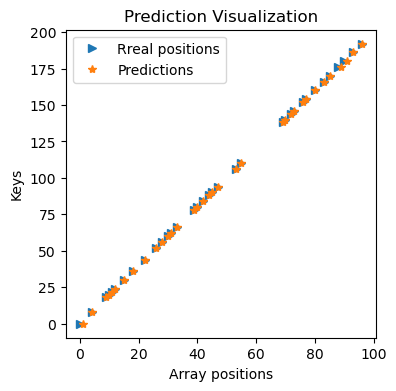

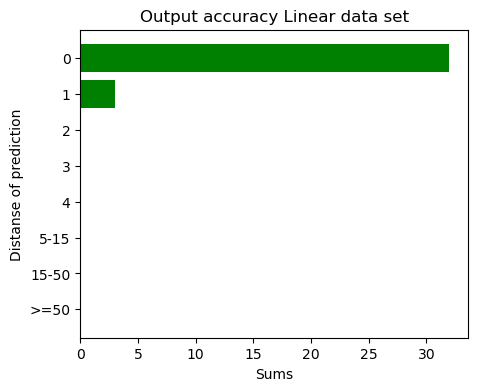

In [83]:
data_store["Linear"].update( gaus_plot('Linear', 0.65))

### Sorted dataset test 

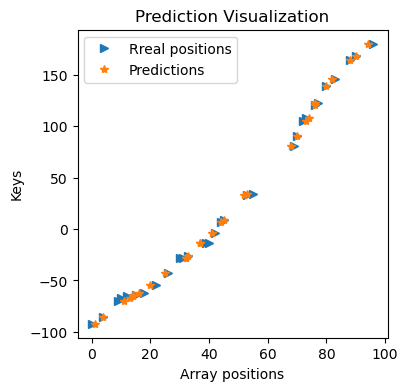

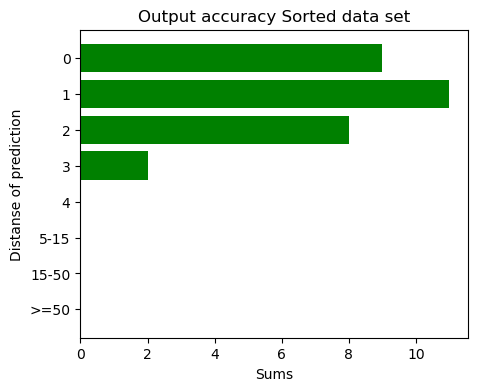

In [84]:
data_store["Sorted"].update(gaus_plot('Sorted', 0.7))

### Eponential dataset test 

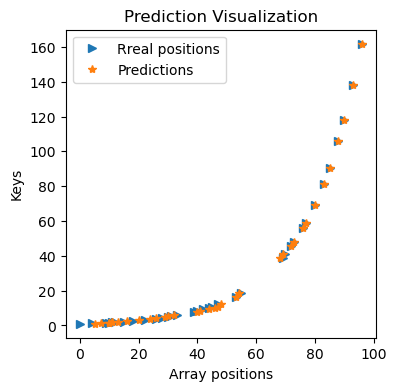

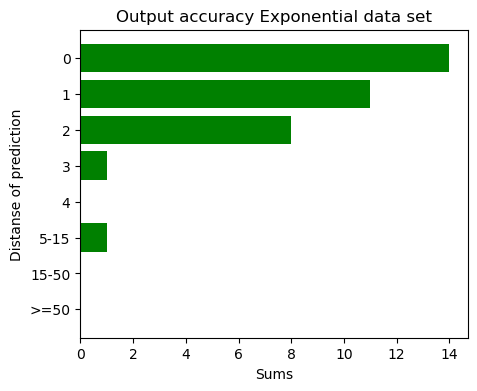

In [96]:
data_store["Exponential"].update(gaus_plot('Exponential', 0.65))

# Model comparison 

## Linear dataset  

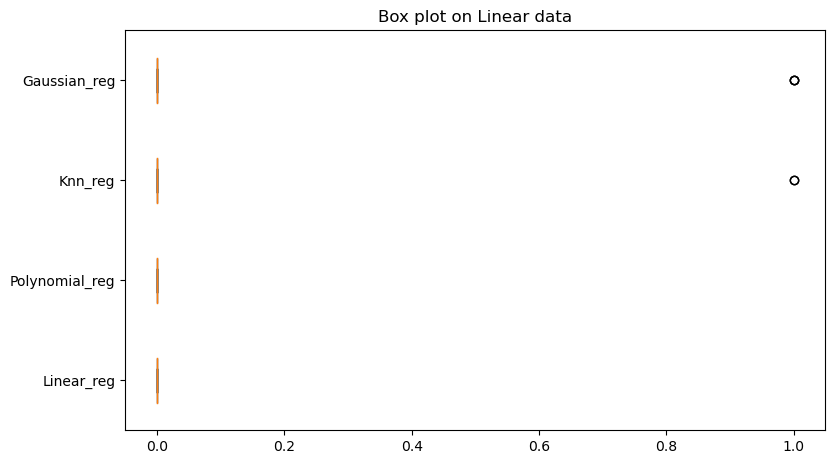

In [113]:
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
data = [data_store["Linear"]["Linear_reg"],data_store["Linear"]["Polynomial_reg"],data_store["Linear"]["Knn_reg"],data_store["Linear"]["Gaussian_reg"]]
# Creating plot
bp = ax.boxplot(data,patch_artist=True, vert = 0)
 
ax.set_yticklabels(['Linear_reg', 'Polynomial_reg', 
                    'Knn_reg', 'Gaussian_reg'])
 
# Adding title 
plt.title("Box plot on Linear data")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
# show plot
plt.show()

## Sorted dataset

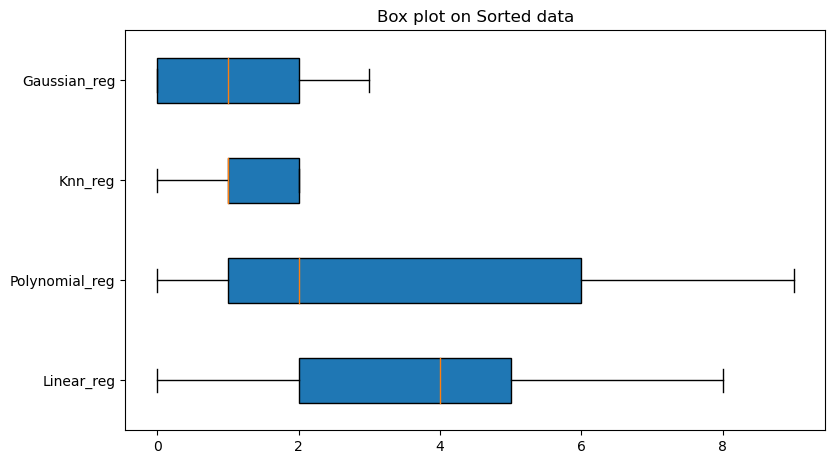

In [112]:
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
data = [data_store["Sorted"]["Linear_reg"],data_store["Sorted"]["Polynomial_reg"],data_store["Sorted"]["Knn_reg"],data_store["Sorted"]["Gaussian_reg"]]
# Creating plot
bp = ax.boxplot(data,patch_artist=True,vert = 0)
 
ax.set_yticklabels(['Linear_reg', 'Polynomial_reg', 
                    'Knn_reg', 'Gaussian_reg'])
 
# Adding title 
plt.title("Box plot on Sorted data")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
# show plot
plt.show()

## Exponential dataset 

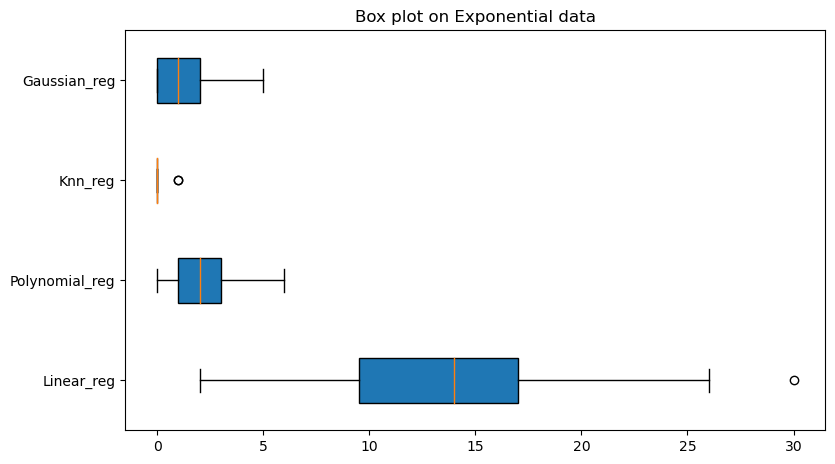

In [114]:
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
data = [data_store["Exponential"]["Linear_reg"],data_store["Exponential"]["Polynomial_reg"],data_store["Exponential"]["Knn_reg"],data_store["Exponential"]["Gaussian_reg"]]
# Creating plot
bp = ax.boxplot(data,patch_artist=True, vert = 0)
 
ax.set_yticklabels(['Linear_reg', 'Polynomial_reg', 
                    'Knn_reg', 'Gaussian_reg'])
 
# Adding title 
plt.title("Box plot on Exponential data")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
# show plot
plt.show()

# Notes

I need a better way to display all information on top of what i have 
so... i got all the hash diagramms and need some number he said to display how accurate the models are (we said absolute mean errors or box diagramms, maybe not ideal because it needs a diagram, typikh apoklisi)
key is to display the results of the models so that i can compare them all easely   

I need to find a good fast and efficiant method to get ther values of ther predictions and the Test_y values 